In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

train = pd.read_csv("../input/bike-sharing-demand/train.csv")
test = pd.read_csv("../input/bike-sharing-demand/test.csv")

In [29]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [30]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [31]:
for df in [train, test]:
    df["datetime"] =  pd.DatetimeIndex(df["datetime"])
    df["hour"] = [x.hour for x in df["datetime"]]
    df["weekday"] = [x.dayofweek for x in df["datetime"]]
    df["month"] = [x.month for x in df["datetime"]]
    df["year"] = [x.year for x in df["datetime"]]
    df.drop('datetime',axis=1,inplace=True)

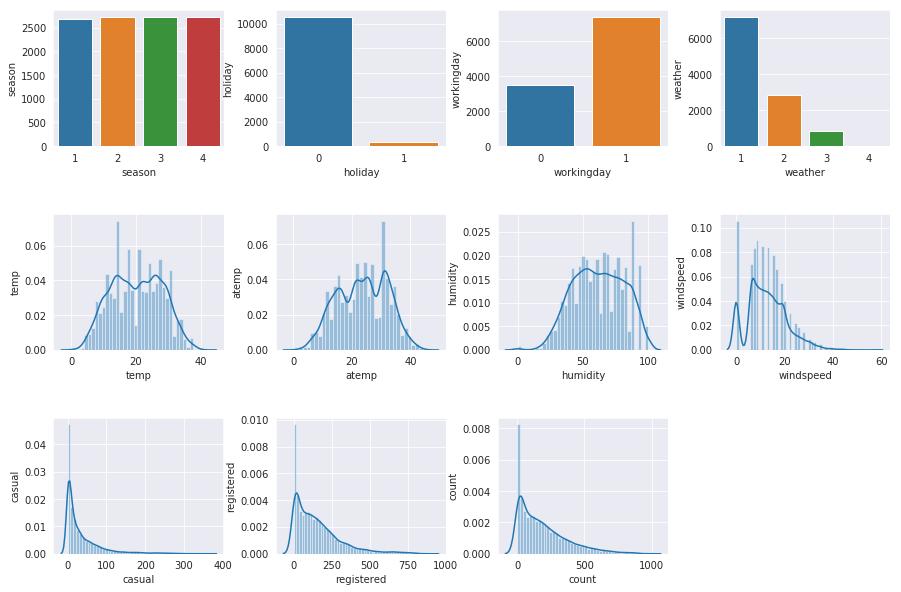

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
for i, col in enumerate(train.columns[:11]):
    plt.subplot(3,4,i+1)
    if str(train[col].dtypes)[:3]=='int':
        if len(train[col].unique()) > 5:
            sns.distplot(train[col])
        else:
            sns.countplot(train[col])
    else:
        sns.distplot(train[col])
    plt.ylabel(col)

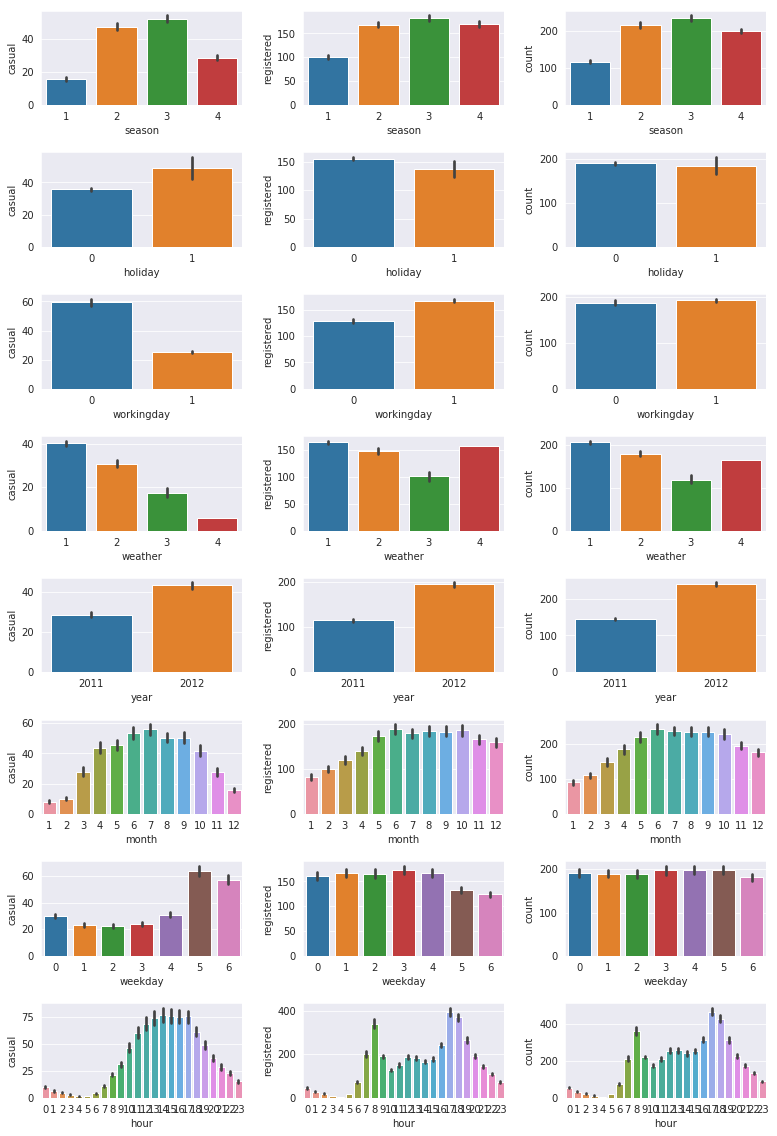

In [33]:
plt.figure(figsize=(13,20))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
col_list = ["season","holiday","workingday","weather","year","month","weekday","hour"]
count_list = ["casual","registered","count"]

for i, col in enumerate(col_list):
    for j, con in enumerate(count_list):
        plt.subplot(8,3,3*i+j+1)
        sns.barplot(train[col],train[con])

## correlation

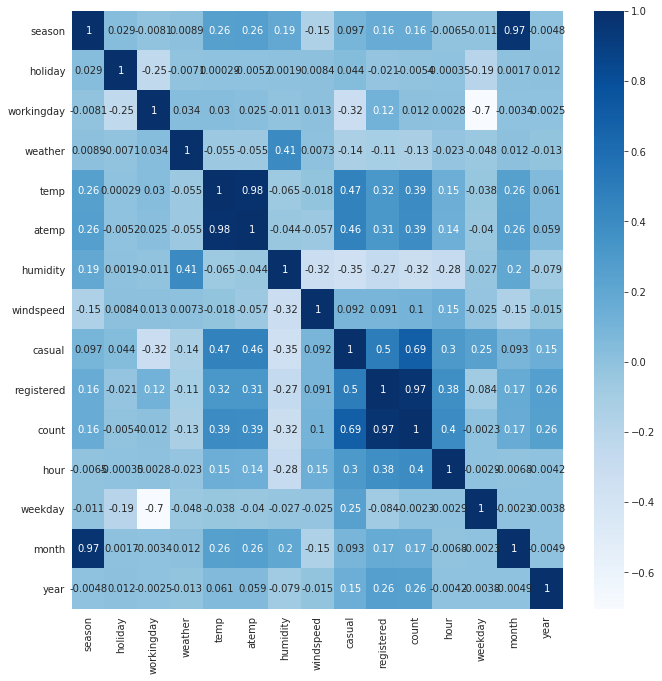

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(train.corr(),annot=True,cmap="Blues")

In [19]:
def high_corr(df, col, ratio):
    Y_corr = df.corr()
    Y_high = Y_corr.loc[:,(Y_corr[col]> ratio)|(Y_corr[col] < -ratio)].columns
    return Y_high
Y_high = high_corr(train, "count", 0.5)
print(Y_high[:-1])

Index(['casual', 'registered'], dtype='object')


In [34]:
df_list = {"train":None, "test" : None}
for name, df in zip(df_list.keys(),[train, test]):
    df["day_code"] = df["holiday"].astype(str) + df["workingday"].astype(str)
    day_code = pd.get_dummies(df["day_code"],drop_first=True,prefix="daycode")
    season = pd.get_dummies(df['season'],prefix='season')
    weather=pd.get_dummies(df['weather'],prefix='weather')
    weekday=pd.get_dummies(df['weekday'],prefix='weekday')
    month=pd.get_dummies(df['month'],prefix='month')
    hour =pd.get_dummies(df['hour'],prefix='hour')
    year = pd.get_dummies(df['year'],prefix='year', drop_first=True)
    df.drop(["day_code","season","weather","hour","weekday","holiday","workingday","month","year"],axis=1,inplace=True)
    df_list[name] = pd.concat([df,day_code,season,weather,weekday,month,hour,year],axis=1,sort=False)

In [35]:
train1 = df_list["train"]
test1 = df_list["test"]
del df_list

In [ ]:
scaler = StandardScaler()
train_sc = scaler.fit_transform(train[[""]])

In [ ]:
for column in train.columns:
    print('{} : {}'.format(column,round(train[column].var()),2))

In [36]:
from sklearn.model_selection import train_test_split
y_list = ["casual","registered","count"]
train_x = train1[train1.columns.difference(y_list)]
train_y = np.log(train1[y_list]+1)
# x_train, x_val, y_train, y_val = train_test_split(train_x,train_y, test_size=0.2, random_state=0)

In [39]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

folds = KFold(n_splits = 5, shuffle = True, random_state = 123)
rms1,rms2 = [],[]
models1,models2 = [], []
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train1)) :
    x_train, y_train = train_x.ix[trn_idx], train_y.ix[trn_idx] 
    x_val, y_val = train_x.ix[val_idx], train_y.ix[val_idx]
    
    lgb_param = {'boosting_type':'gbdt',
             'num_leaves': 45,
             'max_depth': 30,
            'learning_rate': 0.01, 
            'bagging_fraction' : 0.9,
            'bagging_freq': 20,
            'colsample_bytree': 0.9,
             'metric': 'rmse',
            'min_child_weight': 1,
            'min_child_samples': 10,
             'zero_as_missing': True,
            'objective': 'regression',
            }
    train_set1 = lgb.Dataset(x_train, y_train["registered"], silent=False)
    valid_set1 = lgb.Dataset(x_val, y_val["registered"], silent=False)
    lgb_model1 = lgb.train(params = lgb_param, train_set = train_set1 , num_boost_round=5000, early_stopping_rounds=100,verbose_eval=500, valid_sets=valid_set1)
    train_set2 = lgb.Dataset(x_train, y_train["casual"], silent=False)
    valid_set2 = lgb.Dataset(x_val, y_val["casual"], silent=False)
    lgb_model2 = lgb.train(params = lgb_param, train_set = train_set2 , num_boost_round=5000, early_stopping_rounds=100,verbose_eval=500, valid_sets=valid_set2)
    pred1 = lgb_model1.predict(x_val)
    pred2 = lgb_model2.predict(x_val)
    rms1.append(mean_squared_error(pred1,y_val["registered"]))
    rms2.append(mean_squared_error(pred2,y_val["casual"]))
    models1.append(lgb_model1)
    models2.append(lgb_model2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.346785
[1000]	valid_0's rmse: 0.311866
[1500]	valid_0's rmse: 0.306615
[2000]	valid_0's rmse: 0.304583
Early stopping, best iteration is:
[2398]	valid_0's rmse: 0.303315
Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.523595
[1000]	valid_0's rmse: 0.500846
Early stopping, best iteration is:
[1223]	valid_0's rmse: 0.499081


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.350194
[1000]	valid_0's rmse: 0.321353
[1500]	valid_0's rmse: 0.315447
[2000]	valid_0's rmse: 0.312959
Early stopping, best iteration is:
[2361]	valid_0's rmse: 0.311694
Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.539202
[1000]	valid_0's rmse: 0.513158
Early stopping, best iteration is:
[1342]	valid_0's rmse: 0.509164


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.369508
[1000]	valid_0's rmse: 0.335617
[1500]	valid_0's rmse: 0.330368
[2000]	valid_0's rmse: 0.327797
Early stopping, best iteration is:
[2126]	valid_0's rmse: 0.327231
Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.508429
[1000]	valid_0's rmse: 0.482933
[1500]	valid_0's rmse: 0.478822
Early stopping, best iteration is:
[1822]	valid_0's rmse: 0.477668


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.337033
[1000]	valid_0's rmse: 0.306615
[1500]	valid_0's rmse: 0.303226
Early stopping, best iteration is:
[1740]	valid_0's rmse: 0.301147
Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.50607
[1000]	valid_0's rmse: 0.48376
[1500]	valid_0's rmse: 0.478024
Early stopping, best iteration is:
[1823]	valid_0's rmse: 0.476166


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.353602
[1000]	valid_0's rmse: 0.319335
[1500]	valid_0's rmse: 0.312334
Early stopping, best iteration is:
[1500]	valid_0's rmse: 0.312334
Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.5228
[1000]	valid_0's rmse: 0.496442
[1500]	valid_0's rmse: 0.489408
[2000]	valid_0's rmse: 0.487287
Early stopping, best iteration is:
[1918]	valid_0's rmse: 0.487261


In [45]:
print(rms1)
print(rms2)

[0.09199988496833715, 0.09715308840929376, 0.10708007019486493, 0.09068962078378329, 0.0975523255280593]
[0.2490822196249285, 0.25924768862763736, 0.22816640804386398, 0.22673370665945586, 0.23742339284167804]


In [49]:
preds = []
for model in models1:
    casual_pred = model.predict(x_val)
    preds.append(casual_pred)
fin_casual = np.mean(preds, axis=0)

preds = []
for model in models2:
    regi_pred = model.predict(x_val)
    preds.append(regi_pred)
fin_regi = np.mean(preds, axis=0)

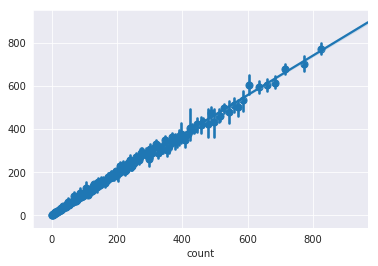

In [51]:
count_pred = np.exp(fin_casual) + np.exp(fin_regi) - 2
sns.regplot(np.exp(y_val["count"]) - 1, count_pred, x_bins = 200)

In [52]:
preds = []
for model in models1:
    casual_pred = model.predict(test1)
    preds.append(casual_pred)
fin_casual = np.mean(preds, axis=0)

preds = []
for model in models2:
    regi_pred = model.predict(test1)
    preds.append(regi_pred)
fin_regi = np.mean(preds, axis=0)
count_pred = np.exp(fin_casual) + np.exp(fin_regi) - 2

In [ ]:
sample = pd.read_csv("../input/bike-sharing-demand/sampleSubmission.csv")
sample["count"] = count_pred
sample.to_csv("sample.csv",index=False)

In [ ]:
sample.tail()